<div style="text-align: center;">
    <h1>Models Training</h1>
</div>


In [67]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import joblib

In [39]:
# Load the preprocessed data from the CSV file
data = pd.read_csv('preprocessed_dialects_data.csv')

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

Logistic Regression Model:

In [41]:
# Vectorize the text data using TF-IDF for the machine learning model
tfidf_vectorizer = TfidfVectorizer(max_features=250000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [42]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)

In [43]:
# Evaluate the Logistic Regression model
print("Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     11484
           1       0.86      0.83      0.84      5578
           2       0.78      0.82      0.80      7268
           3       0.90      0.62      0.74      2283
           4       0.86      0.57      0.68      2932

    accuracy                           0.82     29545
   macro avg       0.84      0.75      0.79     29545
weighted avg       0.83      0.82      0.82     29545

Accuracy: 0.8235572854966999


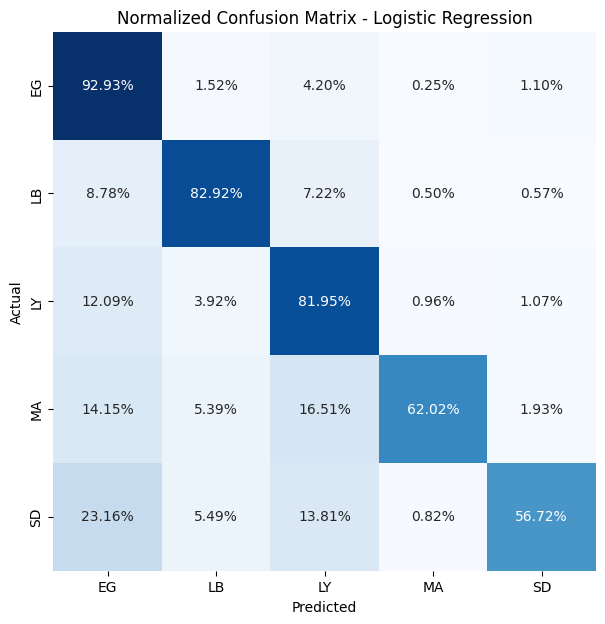

In [44]:
# Calculate confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Normalize confusion matrix
normalized_cm_log_reg = cm_log_reg.astype('float') / cm_log_reg.sum(axis=1)[:, np.newaxis]

# Define target labels
target_labels = ['EG', 'LB', 'LY', 'MA', 'SD']

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(normalized_cm_log_reg, annot=True, cmap='Blues',
            xticklabels=target_labels, yticklabels=target_labels,
            fmt=".2%", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix - Logistic Regression')
plt.show()


Deep Learning Model:

In [45]:
# Tokenize the text data for the deep learning model
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [46]:
# Pad the sequences
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

In [47]:
# Build the neural network model
model = Sequential()
model.add(Dense(512, input_shape=(maxlen,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [48]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               51712     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 316933 (1.21 MB)
Trainable params: 316933 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Train the model
history = model.fit(X_train_pad, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/5
831/831 - 12s - loss: 15.9159 - accuracy: 0.3494 - val_loss: 1.4613 - val_accuracy: 0.3868 - 12s/epoch - 15ms/step
Epoch 2/5
831/831 - 11s - loss: 1.4996 - accuracy: 0.3892 - val_loss: 1.4530 - val_accuracy: 0.3868 - 11s/epoch - 13ms/step
Epoch 3/5
831/831 - 11s - loss: 1.4665 - accuracy: 0.3902 - val_loss: 1.4528 - val_accuracy: 0.3868 - 11s/epoch - 13ms/step
Epoch 4/5
831/831 - 10s - loss: 1.4583 - accuracy: 0.3906 - val_loss: 1.4529 - val_accuracy: 0.3868 - 10s/epoch - 12ms/step
Epoch 5/5
831/831 - 13s - loss: 1.4584 - accuracy: 0.3907 - val_loss: 1.4529 - val_accuracy: 0.3868 - 13s/epoch - 15ms/step


In [51]:
# Evaluate the model
y_pred_nn = model.predict(X_test_pad)
y_pred_nn_classes = y_pred_nn.argmax(axis=-1)

924/924 [==============================] - 3s 4ms/step


In [52]:
print("Neural Network Model Performance:")
print(classification_report(y_test, y_pred_nn_classes))
print("Accuracy:", accuracy_score(y_test, y_pred_nn_classes))

Neural Network Model Performance:
              precision    recall  f1-score   support

           0       0.39      1.00      0.56     11484
           1       0.00      0.00      0.00      5578
           2       0.00      0.00      0.00      7268
           3       0.00      0.00      0.00      2283
           4       0.00      0.00      0.00      2932

    accuracy                           0.39     29545
   macro avg       0.08      0.20      0.11     29545
weighted avg       0.15      0.39      0.22     29545

Accuracy: 0.3886952106955492


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


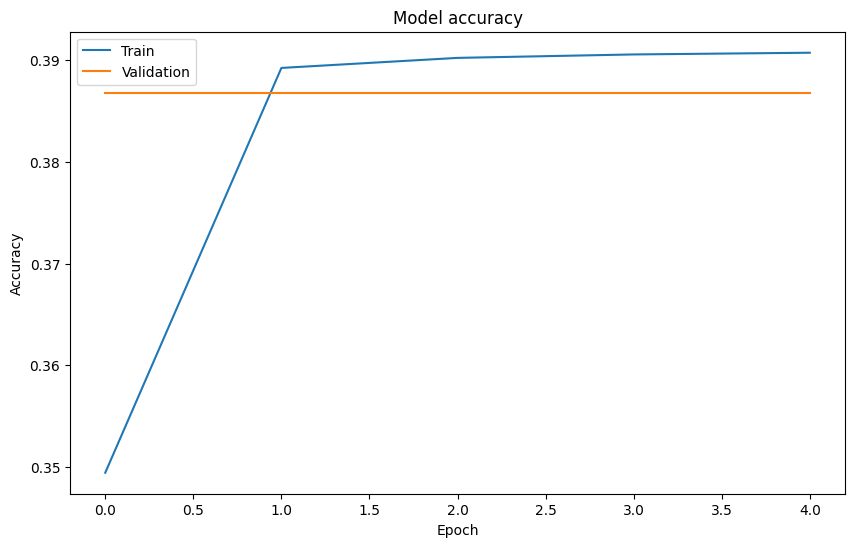

In [53]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

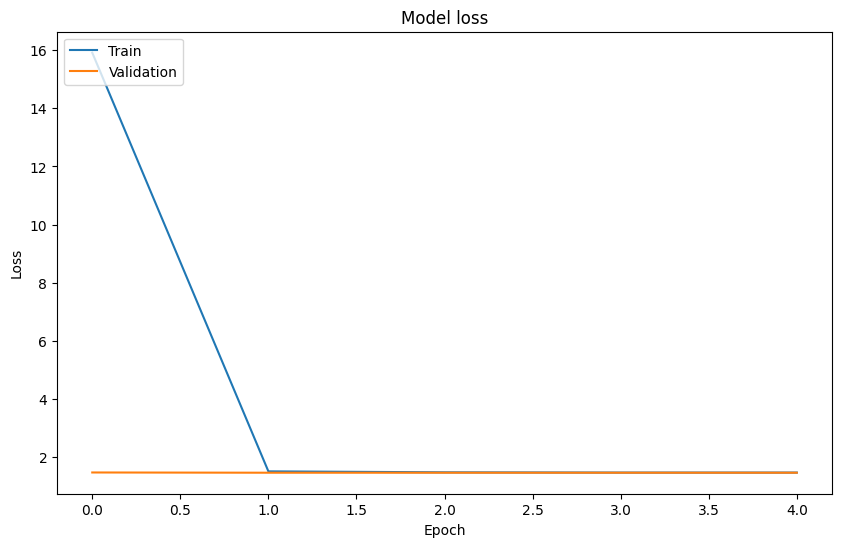

In [54]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<div style="text-align: center;">
    <h1>It seems that the logistic regression model is better than the neural network model.</h1>
</div>


# Since the data is imbalanced, let's try to use weighted classes:

In [55]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [56]:
class_weights

array([0.51213382, 1.07246245, 0.80859362, 2.55358686, 2.05494697])

In [57]:
# Initialize logistic regression model with weighted classes
log_reg_weighted = LogisticRegression(class_weight=dict(zip(np.unique(y_train), class_weights)), max_iter=1000)

In [58]:
log_reg_weighted

LogisticRegression(class_weight={0: 0.5121338186860808, 1: 1.0724624529243614,
                                 2: 0.8085936163661865, 3: 2.5535868625756266,
                                 4: 2.0549469657450876},
                   max_iter=1000)

In [59]:
# Fit the model
log_reg_weighted.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight={0: 0.5121338186860808, 1: 1.0724624529243614,
                                 2: 0.8085936163661865, 3: 2.5535868625756266,
                                 4: 2.0549469657450876},
                   max_iter=1000)

In [60]:
# Predict on the test set
y_pred_log_reg_weighted = log_reg_weighted.predict(X_test_tfidf)

In [61]:
# Evaluate the model
print("Logistic Regression Model with Weighted Classes Performance:")
print(classification_report(y_test, y_pred_log_reg_weighted))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_weighted))

Logistic Regression Model with Weighted Classes Performance:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     11484
           1       0.83      0.86      0.85      5578
           2       0.80      0.80      0.80      7268
           3       0.69      0.76      0.72      2283
           4       0.66      0.72      0.69      2932

    accuracy                           0.81     29545
   macro avg       0.77      0.79      0.78     29545
weighted avg       0.82      0.81      0.82     29545

Accuracy: 0.8148925368082586


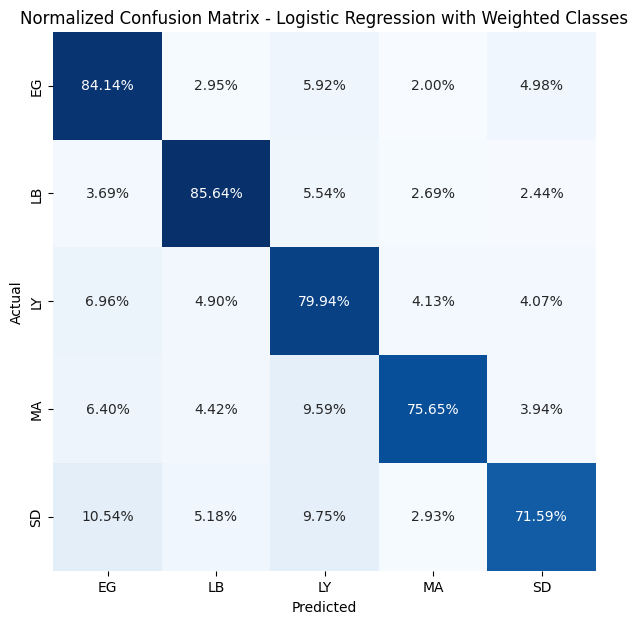

In [62]:
# Calculate confusion matrix
cm_log_reg_weighted = confusion_matrix(y_test, y_pred_log_reg_weighted)

# Normalize confusion matrix
normalized_cm_log_reg_weighted = cm_log_reg_weighted.astype('float') / cm_log_reg_weighted.sum(axis=1)[:, np.newaxis]

# Define target labels
target_labels = ['EG', 'LB', 'LY', 'MA', 'SD']

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(normalized_cm_log_reg_weighted, annot=True, cmap='Blues',
            xticklabels=target_labels, yticklabels=target_labels,
            fmt=".2%", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix - Logistic Regression with Weighted Classes')
plt.show()

Naive-Bayes Classifier:

In [63]:
# Initialize Naive-Bayes classifier with class weights
nb_model_weighted = MultinomialNB(class_prior=class_weights)

In [64]:
# Train the model
nb_model_weighted.fit(X_train_tfidf, y_train)

MultinomialNB(class_prior=array([0.51213382, 1.07246245, 0.80859362, 2.55358686, 2.05494697]))

In [65]:
y_pred_nb_weighted = nb_model_weighted.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_nb_weighted))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87     11484
           1       0.87      0.86      0.87      5578
           2       0.89      0.75      0.82      7268
           3       0.57      0.78      0.66      2283
           4       0.58      0.70      0.64      2932

    accuracy                           0.81     29545
   macro avg       0.76      0.79      0.77     29545
weighted avg       0.83      0.81      0.82     29545



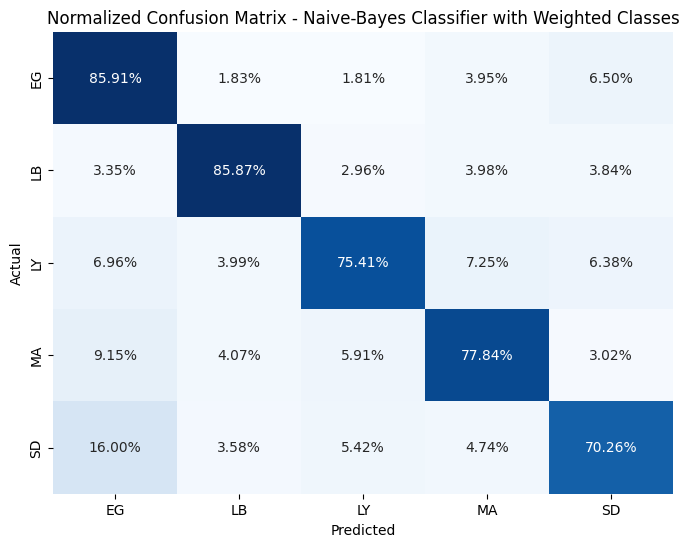

In [66]:
cm_nb_weighted = confusion_matrix(y_test, y_pred_nb_weighted)
normalized_cm_nb_weighted = cm_nb_weighted.astype('float') / cm_nb_weighted.sum(axis=1)[:, np.newaxis]

target_labels = ['EG', 'LB', 'LY', 'MA', 'SD']

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_cm_nb_weighted, annot=True, cmap='Blues',
            xticklabels=target_labels, yticklabels=target_labels,
            fmt=".2%", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix - Naive-Bayes Classifier with Weighted Classes')
plt.show()


Saving the models:

In [70]:
# Save Logistic Regression model
joblib.dump(log_reg, 'log_reg_model.pkl')

['log_reg_model.pkl']

In [71]:
# Save deep learning model
model.save('deep_learning_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
# Save Logistic Regression model with weighted classes
joblib.dump(log_reg_weighted, 'log_reg_weighted_model.pkl')

['log_reg_weighted_model.pkl']

In [69]:
# Save Naive Bayes model with weighted classes
joblib.dump(nb_model_weighted, 'nb_model_weighted.pkl')

['nb_model_weighted.pkl']

In [72]:
# Save the TF-IDF vectorizer used during training
joblib.dump(tfidf_vectorizer , 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']